<a href="https://colab.research.google.com/github/WaterPurify/Text_Mining/blob/main/%EC%95%84%EA%B3%A0%EB%8B%A4_%EB%A6%AC%EB%B7%B0_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%A7%88%EC%9D%B4%EB%8B%9D_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기 & 합치기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 한글 지원 라이브러리 설치
!pip install koreanize-matplotlib

import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.9 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/딥러닝 부트캠프/텍스트 마이닝 팀프로젝트/'
d1 = pd.read_csv(path + '아고다크롤링_리뷰랑날짜.csv')
d2 = pd.read_csv(path + '아고다크롤링_국적객실유형.csv')
d3 = pd.read_csv(path + '아고다크롤링_평점이랑여행유형.csv')

# 데이터프레임을 열 방향으로 합치기
df = pd.concat([d1, d2, d3], axis=1)

df


,review_content,date_text,reviewer_country,room_type,review_score,group
0,Is it necessary to write a review for this hot...,Stayed 2 nights in November 2023,Yumi from South Korea,Standard Double Mountain,10.0,Solo traveler
1,"As expected, Shilla is Shilla!! Adding the eve...",Stayed 1 night in November 2023,Seo from South Korea,Deluxe Double Mountain,10.0,Couple
2,Exellent Location & Service”\nWe stayed at Shi...,Stayed 3 nights in October 2023,Aya from United States,Deluxe Double Mountain,10.0,Couple
3,"""I can understand why many people are looking ...",Stayed 2 nights in October 2023,sang from South Korea,Standard Twin Mountain,10.0,Couple
4,완벽산 신라호텔 경험”\n가든뷰에 17개월 아기와 함께 묵었습니다. 비록 저녁에 윗...,Stayed 1 night in September 2023,SEUNGJIN from South Korea,Premier Terrace Double Garden,10.0,Family with young children
...,...,...,...,...,...,...
2595,A very nice resort”\nMake you feel great once ...,Stayed 2 nights in October 2016,"wai from Hong Kong SAR, China",NaN,9.2,Family with teens
2596,The hotel rooms update is way over due.”\nThe ...,Stayed 5 nights in October 2016,David from United States,NaN,6.4,Family with teens
2597,Hotel with great children facilities”\nThis ho...,Stayed 3 nights in June 2016,Chye from Singapore,NaN,9.2,Family with young children
2598,Perfect Hotel for Relaxing”\nThe hotel offers ...,Stayed 2 nights in September 2016,suryati from Indonesia,NaN,9.2,Group


In [ ]:
df.shape

(2600, 6)

In [ ]:
df.review_content.unique()

array(["Is it necessary to write a review for this hotel?”\nThey upgraded my room so I decided to write a review haha. This is the best hotel that everyone in Korea knows about, with service and facilities that match its reputation. The staff are friendly (even though I checked in late, I still got a room upgrade) and the interior design turns the old into vintage, but it's not outdated at all. During my stay, I walked around the well-maintained gardens near the hotel after having breakfast, and it was the happiest memory of my Jeju trip. Even if there are many new and good hotels, Shilla is definitely the best in Jeju. I plan to go again next year... I need to make more money...",
       "As expected, Shilla is Shilla!! Adding the evening view at The Parkview made it completely satisfying.”\nDuring the room change, the female staff member who helped us was very kind and helpful. Unfortunately, we couldn't see her name because her jacket was covering it. She was really great! All the o

In [ ]:
len(df.review_content.unique())

134

In [ ]:
# 중복된 값 제거
unique_values = df.drop_duplicates(subset=['review_content'])

unique_values

,review_content,date_text,reviewer_country,room_type,review_score,group,review_len,stay
stay_date,,,,,,,,
2023-11-01,Is it necessary to write a review for this hot...,Stayed 2 nights in November 2023,Yumi from South Korea,Standard Double Mountain,10.0,Solo traveler,679,2
2023-11-01,"As expected, Shilla is Shilla!! Adding the eve...",Stayed 1 night in November 2023,Seo from South Korea,Deluxe Double Mountain,10.0,Couple,595,1
2023-10-01,Exellent Location & Service”\nWe stayed at Shi...,Stayed 3 nights in October 2023,Aya from United States,Deluxe Double Mountain,10.0,Couple,384,3
2023-10-01,"""I can understand why many people are looking ...",Stayed 2 nights in October 2023,sang from South Korea,Standard Twin Mountain,10.0,Couple,787,2
2023-09-01,완벽산 신라호텔 경험”\n가든뷰에 17개월 아기와 함께 묵었습니다. 비록 저녁에 윗...,Stayed 1 night in September 2023,SEUNGJIN from South Korea,Premier Terrace Double Garden,10.0,Family with young children,237,1
...,...,...,...,...,...,...,...,...
2016-10-01,A very nice resort”\nMake you feel great once ...,Stayed 2 nights in October 2016,"wai from Hong Kong SAR, China",NaN,9.2,Family with teens,234,2
2016-10-01,The hotel rooms update is way over due.”\nThe ...,Stayed 5 nights in October 2016,David from United States,NaN,6.4,Family with teens,1021,5
2016-06-01,Hotel with great children facilities”\nThis ho...,Stayed 3 nights in June 2016,Chye from Singapore,NaN,9.2,Family with young children,183,3


In [ ]:
df.isna().sum()

review_content         0
date_text              0
reviewer_country       0
room_type           2084
review_score           0
group                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_content    2600 non-null   object 
 1   date_text         2600 non-null   object 
 2   reviewer_country  2600 non-null   object 
 3   room_type         516 non-null    object 
 4   review_score      2600 non-null   float64
 5   group             2600 non-null   object 
dtypes: float64(1), object(5)
memory usage: 122.0+ KB


In [ ]:
df.describe()

,review_score
count,2600.000000
mean,8.819615
std,1.299821
min,3.600000
25%,8.300000
50%,9.200000
75%,10.000000
max,10.000000


## 데이터 전처리

date_text에서 몇박을 묵었는지, 숙박 연월 추출

reviewer_country에서 from 기준으로 리뷰자 국적 추출

review 길이로 파생 변수 만들기

In [ ]:
df['review_len'] = df['review_content'].apply(len)
df

,review_content,date_text,reviewer_country,room_type,review_score,group,review_len
0,Is it necessary to write a review for this hot...,Stayed 2 nights in November 2023,Yumi from South Korea,Standard Double Mountain,10.0,Solo traveler,679
1,"As expected, Shilla is Shilla!! Adding the eve...",Stayed 1 night in November 2023,Seo from South Korea,Deluxe Double Mountain,10.0,Couple,595
2,Exellent Location & Service”\nWe stayed at Shi...,Stayed 3 nights in October 2023,Aya from United States,Deluxe Double Mountain,10.0,Couple,384
3,"""I can understand why many people are looking ...",Stayed 2 nights in October 2023,sang from South Korea,Standard Twin Mountain,10.0,Couple,787
4,완벽산 신라호텔 경험”\n가든뷰에 17개월 아기와 함께 묵었습니다. 비록 저녁에 윗...,Stayed 1 night in September 2023,SEUNGJIN from South Korea,Premier Terrace Double Garden,10.0,Family with young children,237
...,...,...,...,...,...,...,...
2595,A very nice resort”\nMake you feel great once ...,Stayed 2 nights in October 2016,"wai from Hong Kong SAR, China",NaN,9.2,Family with teens,234
2596,The hotel rooms update is way over due.”\nThe ...,Stayed 5 nights in October 2016,David from United States,NaN,6.4,Family with teens,1021
2597,Hotel with great children facilities”\nThis ho...,Stayed 3 nights in June 2016,Chye from Singapore,NaN,9.2,Family with young children,183
2598,Perfect Hotel for Relaxing”\nThe hotel offers ...,Stayed 2 nights in September 2016,suryati from Indonesia,NaN,9.2,Group,104


In [ ]:
text = 'Stayed 2 nights in October 2016'
a = int(text.split('Stayed ')[1].split(' ')[0])
a

2

In [ ]:
def date_extract(review):
    text = str(review)
    stay = int(text.split('Stayed ')[1].split(' ')[0])
    return stay

df['stay'] = df['date_text'].apply(date_extract)
df

,review_content,date_text,reviewer_country,room_type,review_score,group,review_len,stay
0,Is it necessary to write a review for this hot...,Stayed 2 nights in November 2023,Yumi from South Korea,Standard Double Mountain,10.0,Solo traveler,679,2
1,"As expected, Shilla is Shilla!! Adding the eve...",Stayed 1 night in November 2023,Seo from South Korea,Deluxe Double Mountain,10.0,Couple,595,1
2,Exellent Location & Service”\nWe stayed at Shi...,Stayed 3 nights in October 2023,Aya from United States,Deluxe Double Mountain,10.0,Couple,384,3
3,"""I can understand why many people are looking ...",Stayed 2 nights in October 2023,sang from South Korea,Standard Twin Mountain,10.0,Couple,787,2
4,완벽산 신라호텔 경험”\n가든뷰에 17개월 아기와 함께 묵었습니다. 비록 저녁에 윗...,Stayed 1 night in September 2023,SEUNGJIN from South Korea,Premier Terrace Double Garden,10.0,Family with young children,237,1
...,...,...,...,...,...,...,...,...
2595,A very nice resort”\nMake you feel great once ...,Stayed 2 nights in October 2016,"wai from Hong Kong SAR, China",NaN,9.2,Family with teens,234,2
2596,The hotel rooms update is way over due.”\nThe ...,Stayed 5 nights in October 2016,David from United States,NaN,6.4,Family with teens,1021,5
2597,Hotel with great children facilities”\nThis ho...,Stayed 3 nights in June 2016,Chye from Singapore,NaN,9.2,Family with young children,183,3
2598,Perfect Hotel for Relaxing”\nThe hotel offers ...,Stayed 2 nights in September 2016,suryati from Indonesia,NaN,9.2,Group,104,2


In [ ]:
 month_map = { 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

In [ ]:
def stay_date(review):
    text = str(review)
    month, year = text.split('in ')[1].split(' ')[-2:]
    month = month_map.get(month)
    date= f"{year}-{month:02d}"
    return date

df['stay_date'] = df['date_text'].apply(stay_date)
df['stay_date'] = pd.to_datetime(df['stay_date'])
df

,review_content,date_text,reviewer_country,room_type,review_score,group,review_len,stay,stay_date
0,Is it necessary to write a review for this hot...,Stayed 2 nights in November 2023,Yumi from South Korea,Standard Double Mountain,10.0,Solo traveler,679,2,2023-11-01
1,"As expected, Shilla is Shilla!! Adding the eve...",Stayed 1 night in November 2023,Seo from South Korea,Deluxe Double Mountain,10.0,Couple,595,1,2023-11-01
2,Exellent Location & Service”\nWe stayed at Shi...,Stayed 3 nights in October 2023,Aya from United States,Deluxe Double Mountain,10.0,Couple,384,3,2023-10-01
3,"""I can understand why many people are looking ...",Stayed 2 nights in October 2023,sang from South Korea,Standard Twin Mountain,10.0,Couple,787,2,2023-10-01
4,완벽산 신라호텔 경험”\n가든뷰에 17개월 아기와 함께 묵었습니다. 비록 저녁에 윗...,Stayed 1 night in September 2023,SEUNGJIN from South Korea,Premier Terrace Double Garden,10.0,Family with young children,237,1,2023-09-01
...,...,...,...,...,...,...,...,...,...
2595,A very nice resort”\nMake you feel great once ...,Stayed 2 nights in October 2016,"wai from Hong Kong SAR, China",NaN,9.2,Family with teens,234,2,2016-10-01
2596,The hotel rooms update is way over due.”\nThe ...,Stayed 5 nights in October 2016,David from United States,NaN,6.4,Family with teens,1021,5,2016-10-01
2597,Hotel with great children facilities”\nThis ho...,Stayed 3 nights in June 2016,Chye from Singapore,NaN,9.2,Family with young children,183,3,2016-06-01
2598,Perfect Hotel for Relaxing”\nThe hotel offers ...,Stayed 2 nights in September 2016,suryati from Indonesia,NaN,9.2,Group,104,2,2016-09-01


In [ ]:
def remove_newline(text):
    # 문자열에서 '\n'을 제거하고 반환
    return text.replace('\n', '')

df['cleaned_review'] = df['review_content'].apply(remove_newline)
df

,review_content,date_text,reviewer_country,room_type,review_score,group,review_len,stay,stay_date,cleaned_review
0,Is it necessary to write a review for this hot...,Stayed 2 nights in November 2023,Yumi from South Korea,Standard Double Mountain,10.0,Solo traveler,679,2,Stayed 2 nights in November 2023,Is it necessary to write a review for this hot...
1,"As expected, Shilla is Shilla!! Adding the eve...",Stayed 1 night in November 2023,Seo from South Korea,Deluxe Double Mountain,10.0,Couple,595,1,Stayed 1 night in November 2023,"As expected, Shilla is Shilla!! Adding the eve..."
2,Exellent Location & Service”\nWe stayed at Shi...,Stayed 3 nights in October 2023,Aya from United States,Deluxe Double Mountain,10.0,Couple,384,3,Stayed 3 nights in October 2023,Exellent Location & Service”We stayed at Shill...
3,"""I can understand why many people are looking ...",Stayed 2 nights in October 2023,sang from South Korea,Standard Twin Mountain,10.0,Couple,787,2,Stayed 2 nights in October 2023,"""I can understand why many people are looking ..."
4,완벽산 신라호텔 경험”\n가든뷰에 17개월 아기와 함께 묵었습니다. 비록 저녁에 윗...,Stayed 1 night in September 2023,SEUNGJIN from South Korea,Premier Terrace Double Garden,10.0,Family with young children,237,1,Stayed 1 night in September 2023,완벽산 신라호텔 경험”가든뷰에 17개월 아기와 함께 묵었습니다. 비록 저녁에 윗층에...
...,...,...,...,...,...,...,...,...,...,...
2595,A very nice resort”\nMake you feel great once ...,Stayed 2 nights in October 2016,"wai from Hong Kong SAR, China",NaN,9.2,Family with teens,234,2,Stayed 2 nights in October 2016,A very nice resort”Make you feel great once yo...
2596,The hotel rooms update is way over due.”\nThe ...,Stayed 5 nights in October 2016,David from United States,NaN,6.4,Family with teens,1021,5,Stayed 5 nights in October 2016,The hotel rooms update is way over due.”The Sh...
2597,Hotel with great children facilities”\nThis ho...,Stayed 3 nights in June 2016,Chye from Singapore,NaN,9.2,Family with young children,183,3,Stayed 3 nights in June 2016,Hotel with great children facilities”This hote...
2598,Perfect Hotel for Relaxing”\nThe hotel offers ...,Stayed 2 nights in September 2016,suryati from Indonesia,NaN,9.2,Group,104,2,Stayed 2 nights in September 2016,Perfect Hotel for Relaxing”The hotel offers ma...


## EDA 시각화

리뷰 점수

Text(0, 0.5, 'Density')

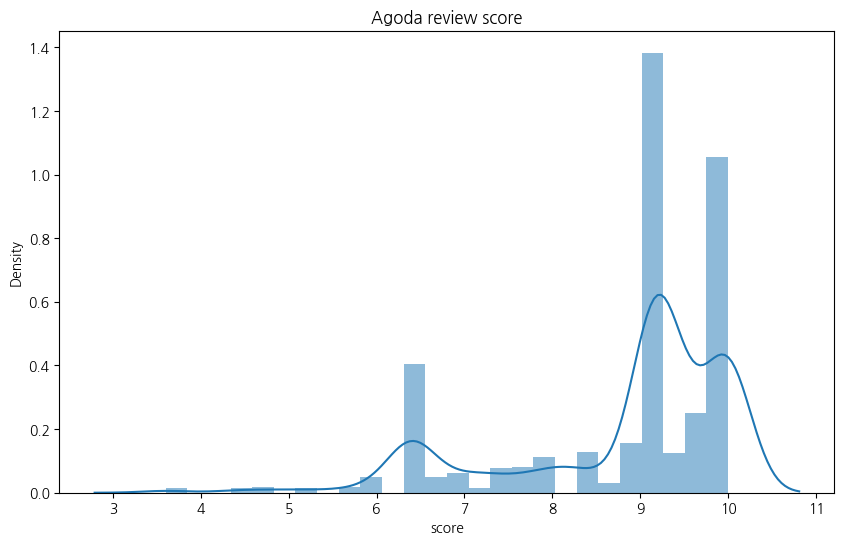

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['review_score'], hist_kws={'alpha': 0.5})

plt.title('Agoda review score')
plt.xlabel('score')
plt.ylabel('Density')

여행 유형

<Axes: xlabel='count', ylabel='group'>

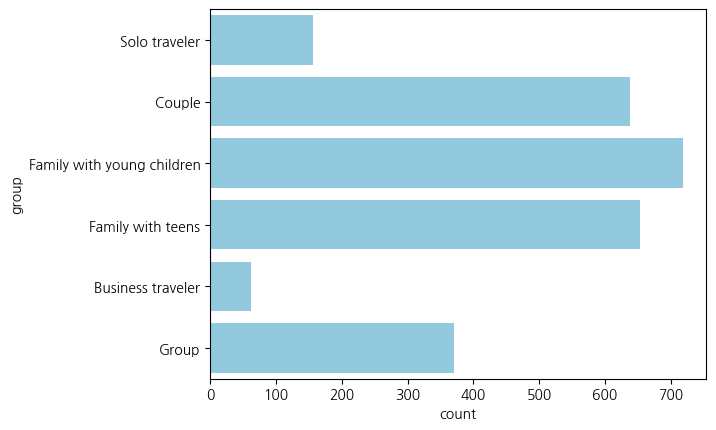

In [ ]:
sns.countplot(y = df['group'], color = 'skyblue')

Text(0, 0.5, 'Density')

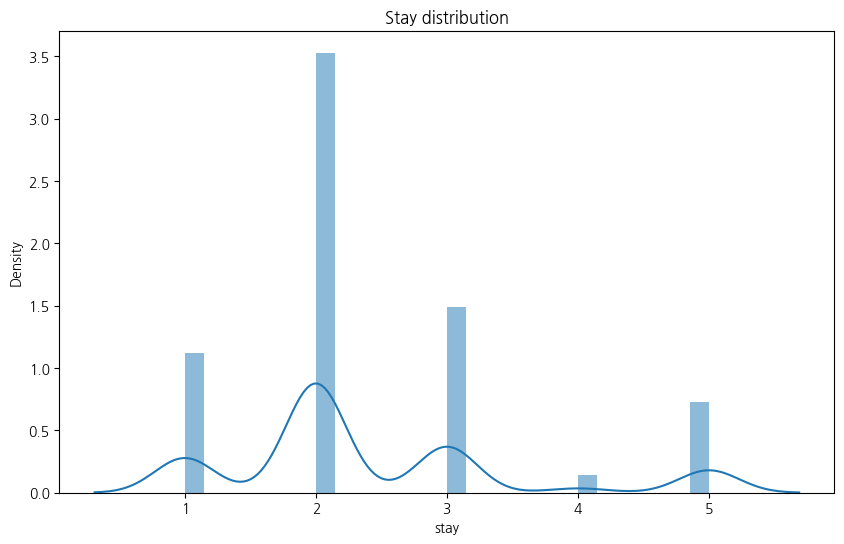

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['stay'], hist_kws={'alpha': 0.5})

plt.title('Stay distribution')
plt.xlabel('stay')
plt.ylabel('Density')

## K-means clustering 리뷰 분류

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
def preprocess_data(sentences):
    # TF-IDF 벡터화
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(sentences)
    return X

def cluster_sentences(sentences, num_clusters):
    X = preprocess_data(sentences)

    # K-means 클러스터링
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)

    return X, kmeans.labels_

In [ ]:
sentences = df.review_content.dropna().tolist()


In [ ]:
X = preprocess_data(sentences)

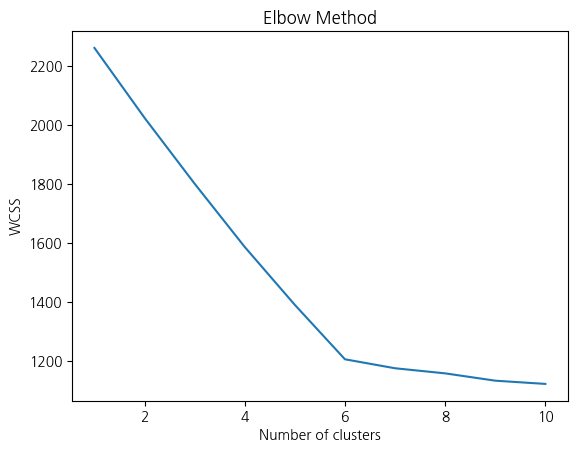

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for Within-Cluster Sum of Squares
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans

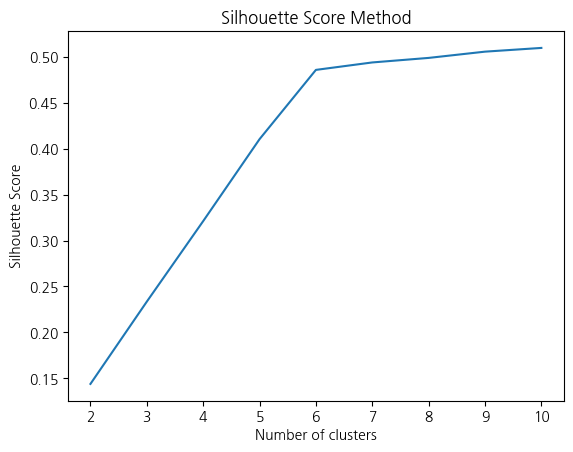

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the Silhouette Score graph
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=6, n_init=10, random_state=0)

In [ ]:
# Access the labels assigned to each data point
labels = kmeans.labels_
print(len(labels))

# Access the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_
print(len(centroids))

2600
6


In [ ]:
df5= df[df.review_content.isna() == False].copy()
df5['label_5'] = labels

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)

# Fit and transform the data
# X_svd_dense = svd.fit_transform(X_dense)
X_svd_sparse = svd.fit_transform(X)

print(X_svd_sparse)

[[ 0.37297935  0.04821975]
 [ 0.23817187  0.00501257]
 [ 0.1892664  -0.04539702]
 ...
 [ 0.63219174 -0.37009769]
 [ 0.55643418 -0.5614185 ]
 [ 0.39012024  0.64724034]]


In [ ]:
svd = []
svd = pd.DataFrame(X_svd_sparse)
svd.columns = ['x','y']
svd['labels'] = labels

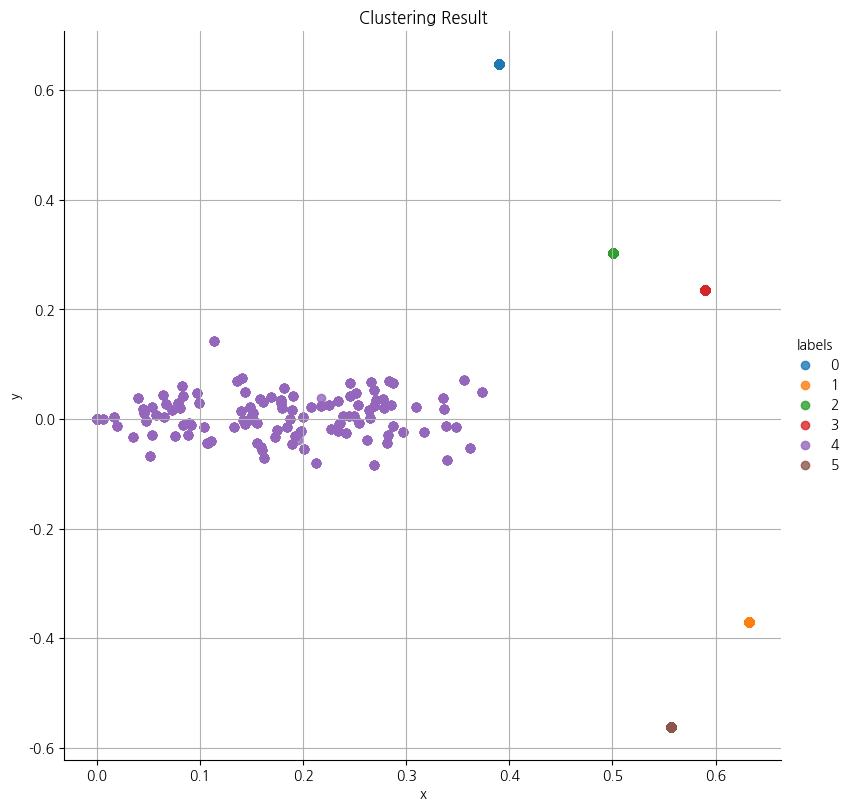

In [ ]:
sns.lmplot(x='x', y='y', hue="labels", data=svd, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

In [ ]:
df5[df5['label_5']==0]['review_content']

stay_date
2016-06-01    Would definitely go there again”\nOne of my fa...
2016-06-01    Would definitely go there again”\nOne of my fa...
2016-06-01    Would definitely go there again”\nOne of my fa...
2016-06-01    Would definitely go there again”\nOne of my fa...
2016-06-01    Would definitely go there again”\nOne of my fa...
                                    ...                        
2016-06-01    Would definitely go there again”\nOne of my fa...
2016-06-01    Would definitely go there again”\nOne of my fa...
2016-06-01    Would definitely go there again”\nOne of my fa...
2016-06-01    Would definitely go there again”\nOne of my fa...
2016-06-01    Would definitely go there again”\nOne of my fa...
Name: review_content, Length: 259, dtype: object